In [1]:
import sys, os
sys.path.append(os.path.abspath('../../../../classifiers'))
sys.path.append(os.path.abspath('../../../../training'))
sys.path.append(os.path.abspath('../../../../validation'))
from validation_functions import execute_training_test_k_fold
from classifiers_ICQ import iqc_classifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
from sklearn import datasets

import numpy as np
import matplotlib.pyplot as plt

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [2]:
range_step = 50
k_times_fold = 10

In [3]:
iris = datasets.load_iris()

y = iris.target
X = PCA(n_components=2).fit_transform(iris.data)[:, :]

In [4]:
dic_classifier_params = {}
dic_classifier_params["sigma_q_params"] = [1,1,1,1]
dic_classifier_params["use_polar_coordinates_on_sigma_q"] = False
dic_classifier_params["load_inputvector_env_state"] = True
dic_classifier_params["normalize_axis"] = 1

In [5]:
dic_training_params = {"max_iter": 1000,
    "accuracy_succ": 0.99,
    "plot_graphs_and_metrics": False,
    "plot_graphs_in_classifier": False,
    "random_seed": 1,
    "learning_rate": 0.01,
    "do_classes_refit":True,
    "reset_weights_epoch":0,
    "batch":1}

In [6]:
%run ../printing_methods.ipynb

In [7]:
negativities_per_class = []
entropies_per_class = []
for clazz in range(len(set(y))):
    negativities_per_class.append([])
    entropies_per_class.append([])

In [8]:
%%time
scores_list = []
f1scores_list = []

for max_iter in range(1, 1000, range_step):
    dic_training_params["max_iter"] = max_iter
    scores, f1scores, output_dict = execute_training_test_k_fold(
                    X, 
                    y, 
                    k_folds=k_times_fold,
                    random_seed=1, 
                    classifier_function=iqc_classifier, 
                    dic_classifier_params=dic_classifier_params,
                    one_vs_classifier=OneVsRestClassifier, 
                    dic_training_params=dic_training_params,
                    print_each_fold_metric=True,
                    print_avg_metric=True)
    scores_list.append(np.mean(scores))
    f1scores_list.append(np.mean(f1scores))

    for clazz in range(len(set(y))):
        negativities_per_class[clazz].append(np.mean(output_dict["negativities"][clazz]))
        entropies_per_class[clazz].append(np.mean(output_dict["entropies"][clazz]))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    9.2s finished


K-Fold #0
Mean negativities for all classes: [0.14788616388531892, 0.019661088393539757, 0.025471315891081394]
Mean entropies for all classes: [2.9701674025189334e-15, 2.3940165027570725e-15, 2.4892806531337483e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #1
Mean negativities for all classes: [0.09045243319148227, 0.012504969001816931, 0.015885216697349252]
Mean entropies for all classes: [2.5020218408895452e-15, 2.463557832592515e-15, 1.4033565955531724e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.11442217233896083, 0.012538344909387277, 0.020651587304674854]
Mean entropies for all classes: [2.3150534752860995e-15, 2.3212392571325162e-15, 1.8286860665682354e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    3.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.12816086224102013, 0.01453834818491769, 0.023224885649545925]
Mean entropies for all classes: [1.5266729515963293e-15, 2.492329119577881e-15, 2.2895986816254307e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.11533688568091674, 0.014178442136142241, 0.021321516145311036]
Mean entropies for all classes: [2.56443751363327e-15, 1.7970506164708345e-15, 2.425121631228955e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.08614862424260274, 0.011376035833886874, 0.015533521967618539]
Mean entropies for all classes: [1.821186012737976e-15, 2.5306339668581322e-15, 2.796683659074458e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.13638245493601223, 0.018254089174588387, 0.022609215149023667]
Mean entropies for all classes: [3.895206606581616e-15, 2.4736438603503716e-15, 2.273599065435866e-15]
              precision    recall  f1-score   support

           0       0.33      1.00      0.50         5
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.11      0.33      0.17        15
weighted avg       0.11      0.33      0.17        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.08462350780708436, 0.012115875127402087, 0.01565724717657162]
Mean entropies for all classes: [2.2667065547789654e-15, 2.0436004820626538e-15, 2.022698872177291e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.13018656690878164, 0.022518811155958218, 0.02237737552123423]
Mean entropies for all classes: [2.8818664029441373e-15, 4.286923820740987e-15, 2.5058700975375472e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    0.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11739875884597412, 0.014479377760495623, 0.019526574449447498]
Mean entropies for all classes: [2.8130654913497313e-15, 1.4981562461138295e-15, 1.1249624496900822e-15]
              precision    recall  f1-score   support

           0       0.36      1.00      0.53         5
           1       1.00      0.20      0.33         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.45      0.40      0.29        15
weighted avg       0.45      0.40      0.29        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4000000000000001 F1-Scores = 0.2717590544989926 Negativity = [0.06433952272331335, 0.039614206296882816, 0.04920403485100766] Entropy = [2.6178215194699183e-15, 2.1229787563450775e-15, 2.154992932995617e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.09660392512125607, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 1.876735455086349e-15, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #3
Mean negativities for all classes: [0.18393708845089443, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.2427918152679414e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       1.00      0.60      0.75         5
           2       0.42      1.00      0.59         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.12822640144454808, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 4.3624853046730965e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11352191056796586]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 2.5550027063891507e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.19689222945708715, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [2.2339851885197016e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.67      0.40      0.50         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.36      0.47      0.36        15
weighted avg       0.36      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.12223145715382407, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.8712440781626614e-15, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.12721533620844253, 0.18356268906075193]
Mean entropies for all classes: [2.0046960421710903e-15, 1.7940032556155724e-15, 1.4552516291558871e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    6.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.5066666666666666 F1-Scores = 0.41042405851229374 Negativity = [0.18800789519902206, 0.11795087558630361, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.9092023624695527e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.09660392512125607, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 1.876735455086349e-15, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.12822640144454808, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 4.3624853046730965e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.12223145715382407, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.8712440781626614e-15, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.12721533620844253, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 1.7940032556155724e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   13.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.11795087558630361, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.9092023624695527e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.09660392512125607, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 1.876735455086349e-15, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.12822640144454808, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 4.3624853046730965e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   19.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.12223145715382407, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.8712440781626614e-15, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.12721533620844253, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 1.7940032556155724e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   20.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.11795087558630361, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.9092023624695527e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.09660392512125607, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 1.876735455086349e-15, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   27.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.11537717241464257, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 3.33337250200797e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.12721533620844253, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 1.7940032556155724e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   28.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.11795087558630361, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.9092023624695527e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.11537717241464257, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 3.33337250200797e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   37.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.12721533620844253, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 1.7940032556155724e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   36.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.7s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.11537717241464257, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 3.33337250200797e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.5s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.8s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   44.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.1350524034004722, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 3.139859490399303e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   45.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.3s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.11537717241464257, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 3.33337250200797e-15, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.47      0.53      0.45        15
weighted avg       0.47      0.53      0.45        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.2s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   52.9s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.0s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   53.1s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18824148180576664, 0.1350524034004722, 0.169734407796405]
Mean entropies for all classes: [2.0046960421710903e-15, 3.139859490399303e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   54.4s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.4866666666666667 F1-Scores = 0.4013009648303766 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   59.6s finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.1350524034004722, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 3.139859490399303e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished


K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.5min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished


K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.6min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.16222300893450473, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [6.373469281628226e-16, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.08788676441780069, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.912254640055758e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       0.50      0.20      0.29         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.29      0.40      0.28        15
weighted avg       0.29      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.7min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.3955820105820106 Negativity = [0.18800789519902206, 0.1015829027201105, 0.1475992954984273] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, 1.719085270989428e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.07543740116187844, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.4251759885274885e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.39548085901027075 Negativity = [0.18800789519902206, 0.1015829027201105, 0.11534343356158394] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, -5.353322855077916e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.07543740116187844, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.4251759885274885e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.0min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.39548085901027075 Negativity = [0.18800789519902206, 0.1015829027201105, 0.11534343356158394] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, -5.353322855077916e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.07543740116187844, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.4251759885274885e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.1min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.39548085901027075 Negativity = [0.18800789519902206, 0.1015829027201105, 0.11534343356158394] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, -5.353322855077916e-15]


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.07543740116187844, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 1.4251759885274885e-15, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.2min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.39548085901027075 Negativity = [0.18800789519902206, 0.1015829027201105, 0.11534343356158394] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, -5.353322855077916e-15]


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.06412398198775492, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 4.628543369176958e-16, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.4min finished


K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
AVG: Scores = 0.48 F1-Scores = 0.39548085901027075 Negativity = [0.18800789519902206, 0.1015829027201105, 0.11534343356158394] Entropy = [2.2134762780581874e-15, 2.6101609956880674e-15, -5.353322855077916e-15]


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division

K-Fold #0
Mean negativities for all classes: [0.20104204783353735, 0.15514197292514656, 0.20783966483838218]
Mean entropies for all classes: [2.4306872157603327e-15, 1.611293838916375e-15, 2.5984477794978548e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.53        15
   macro avg       0.40      0.53      0.43        15
weighted avg       0.40      0.53      0.43        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.5min finished


K-Fold #1
Mean negativities for all classes: [0.13038398207123647, 0.04750000652267675, 0.12686471956641826]
Mean entropies for all classes: [3.3667445046509223e-15, 9.796113547418939e-16, 3.484127127671386e-15]
              precision    recall  f1-score   support

           0       0.38      1.00      0.56         5
           1       1.00      0.40      0.57         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.46      0.47      0.38        15
weighted avg       0.46      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------


c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 1

K-Fold #2
Mean negativities for all classes: [0.06545542312397466, 0.12092428414600896, 0.15965059341476823]
Mean entropies for all classes: [-2.057987745003921e-14, 3.1236215300147822e-15, 1.3962873547906792e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


K-Fold #3
Mean negativities for all classes: [0.13900923506562748, 0.13399982289033555, 0.1727911434105581]
Mean entropies for all classes: [3.1666837810026877e-15, 1.0403302086278678e-15, 3.317465121105556e-15]
              precision    recall  f1-score   support

           0       0.29      0.40      0.33         5
           1       1.00      0.60      0.75         5
           2       0.00      0.00      0.00         5

    accuracy                           0.33        15
   macro avg       0.43      0.33      0.36        15
weighted avg       0.43      0.33      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #4
Mean negativities for all classes: [0.1656990244911958, 0.1025715913095305, 0.1598543162761236]
Mean entropies for all classes: [2.173843870001459e-15, 6.249137546720942e-16, 1.4598167232805792e-15]
              precision    recall  f1-score   support

           0       0.36      0.80      0.50         5
           1       0.75      0.60      0.67         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.37      0.47      0.39        15
weighted avg       0.37      0.47      0.39        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #5
Mean negativities for all classes: [0.12398682923505526, 0.06412398198775492, 0.11328691935057165]
Mean entropies for all classes: [3.1349663188455735e-15, 4.628543369176958e-16, 3.0119042054216587e-15]
              precision    recall  f1-score   support

           0       0.42      1.00      0.59         5
           1       0.33      0.20      0.25         5
           2       0.00      0.00      0.00         5

    accuracy                           0.40        15
   macro avg       0.25      0.40      0.28        15
weighted avg       0.25      0.40      0.28        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.9min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #6
Mean negativities for all classes: [0.1295975678813977, 0.12092156337552887, 0.19390623191295828]
Mean entropies for all classes: [6.1357535548068306e-15, 2.5668671292820975e-15, 2.7656729099958262e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       0.50      0.40      0.44         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.32      0.47      0.36        15
weighted avg       0.32      0.47      0.36        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #7
Mean negativities for all classes: [0.11890275552306541, 0.08713519547608556, 0.11779041279846589]
Mean entropies for all classes: [1.0803065885825292e-14, 3.3904371104784907e-15, 2.8281669259833014e-15]
              precision    recall  f1-score   support

           0       0.45      1.00      0.62         5
           1       1.00      0.80      0.89         5
           2       0.00      0.00      0.00         5

    accuracy                           0.60        15
   macro avg       0.48      0.60      0.50        15
weighted avg       0.48      0.60      0.50        15

-------------------------------------------------------------------------------------------------------------------


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

K-Fold #8
Mean negativities for all classes: [0.18489076859226253, 0.13432260109718008, 0.169734407796405]
Mean entropies for all classes: [1.4010575507359842e-14, 1.8731610220830425e-15, 2.1819827704835866e-15]
              precision    recall  f1-score   support

           0       0.40      0.80      0.53         5
           1       0.60      0.60      0.60         5
           2       0.00      0.00      0.00         5

    accuracy                           0.47        15
   macro avg       0.33      0.47      0.38        15
weighted avg       0.33      0.47      0.38        15

-------------------------------------------------------------------------------------------------------------------
K-Fold #9
Mean negativities for all classes: [0.11547420669585765, 0.1268428108760765, 0.16773802423991235]
Mean entropies for all classes: [5.2602703084902375e-15, 3.3921768540327587e-15, 3.035897253211186e-15]
              precision    recall  f1-score   support

           0       0.38 

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.8min finished
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_star

In [9]:
print_score(scores_list)

Maior Score atingido com 51 épocas: 0.5066666666666666

[0.4000000000000001, 0.5066666666666666, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.4866666666666667, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48, 0.48]




In [10]:
print_f1score(f1scores_list)

Maior F1Score atingido com 51 épocas: 0.41042405851229374

[0.2717590544989926, 0.41042405851229374, 0.4013009648303766, 0.4013009648303766, 0.4013009648303766, 0.4013009648303766, 0.4013009648303766, 0.4013009648303766, 0.3955820105820106, 0.3955820105820106, 0.3955820105820106, 0.3955820105820106, 0.3955820105820106, 0.3955820105820106, 0.39548085901027075, 0.39548085901027075, 0.39548085901027075, 0.39548085901027075, 0.39548085901027075, 0.39548085901027075]




Negativities ao longo do treinamento
Classe 0 [0.1150998430078154, 0.15901113561289598, 0.1477888841168003, 0.1477888841168003, 0.14745601395372446, 0.14745601395372446, 0.14745601395372446, 0.14745601395372446, 0.14712094263237402, 0.14712094263237402, 0.14712094263237402, 0.14712094263237402, 0.14712094263237402, 0.14712094263237402, 0.13744418405132103, 0.13744418405132103, 0.13744418405132103, 0.13744418405132103, 0.13744418405132103, 0.13744418405132103]
Classe 1 [0.01521653816781351, 0.11848980768812292, 0.11848980768812292, 0.11848980768812292, 0.11720488478513238, 0.11229449292527445, 0.1130781996444774, 0.1130781996444774, 0.11179764153396621, 0.11172466130363698, 0.11172466130363698, 0.11172466130363698, 0.11172466130363698, 0.11172466130363698, 0.11047972497804477, 0.11047972497804477, 0.11047972497804477, 0.11047972497804477, 0.10934838306063241, 0.10934838306063241]
Classe 2 [0.020225845595185803, 0.1603519706086305, 0.15894564336045636, 0.15894564336045636, 0.158945643360

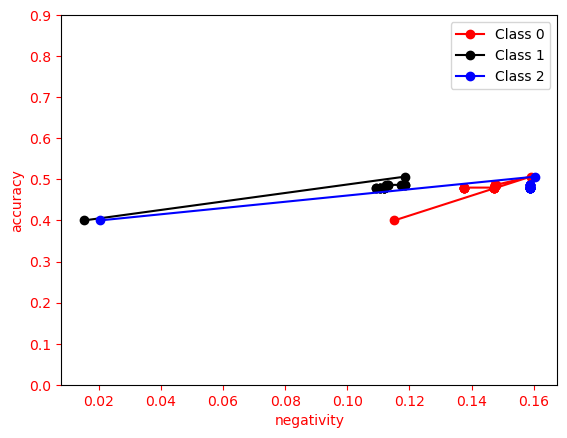

In [11]:
print_negativities(negativities_per_class, scores_list)

Entropies ao longo do treinamento
Classe 0 [2.5556384252316606e-15, 2.6356576270032744e-15, 3.0182236602054617e-15, 3.0182236602054617e-15, 3.9114058409717245e-15, 3.9114058409717245e-15, 3.9114058409717245e-15, 3.9114058409717245e-15, 5.111993787490599e-15, 5.111993787490599e-15, 5.111993787490599e-15, 5.111993787490599e-15, 5.111993787490599e-15, 5.111993787490599e-15, 2.9902713496703967e-15, 2.9902713496703967e-15, 2.9902713496703967e-15, 2.9902713496703967e-15, 2.9902713496703967e-15, 2.9902713496703967e-15]
Classe 1 [2.4301151704656794e-15, 2.5070205326783147e-15, 2.5070205326783147e-15, 2.5070205326783147e-15, 2.4041092524118023e-15, 2.3143968423773567e-15, 2.4489824658557296e-15, 2.4489824658557296e-15, 2.178136591122142e-15, 2.051466744290516e-15, 2.051466744290516e-15, 2.051466744290516e-15, 2.051466744290516e-15, 2.051466744290516e-15, 2.0027588791376887e-15, 2.0027588791376887e-15, 2.0027588791376887e-15, 2.0027588791376887e-15, 1.9065267139767098e-15, 1.9065267139767098e-15

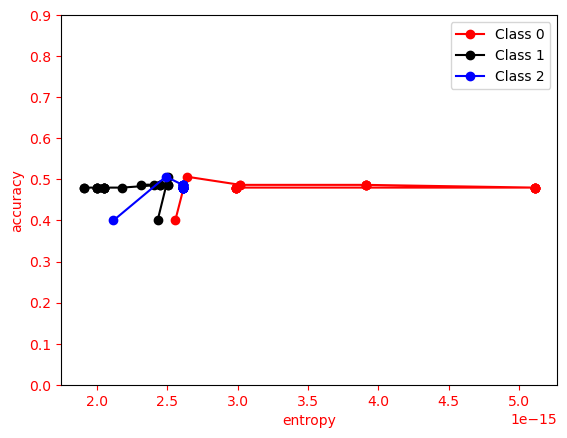

In [12]:
print_entropies(entropies_per_class, scores_list)